In [3]:
import numpy as np

ecg = np.genfromtxt(fname = 'C:\\Users\\user\\Desktop\\ecg_data_1.txt')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


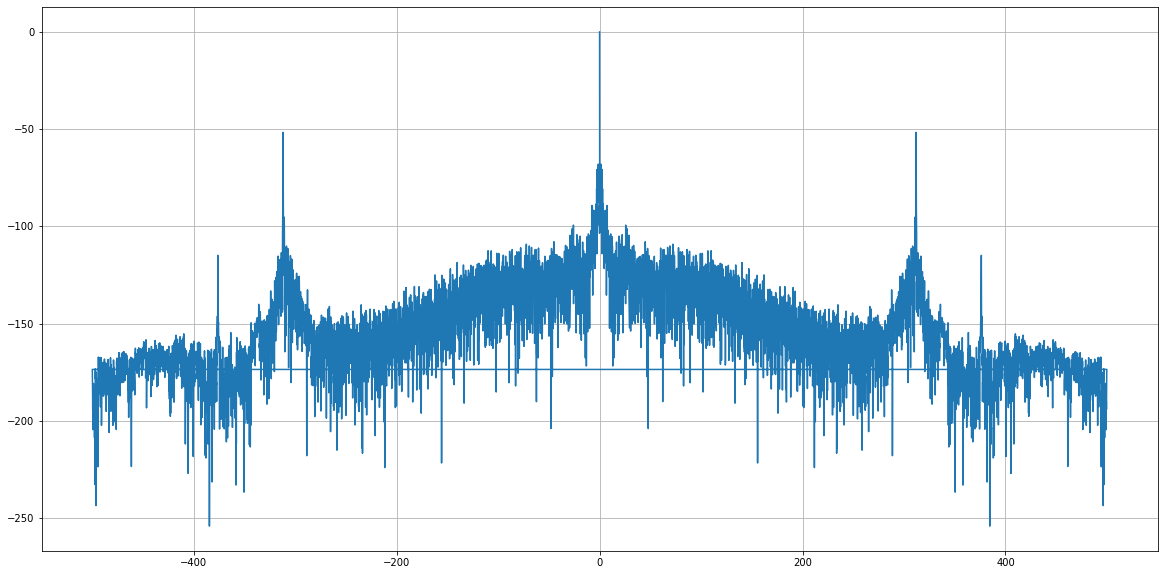

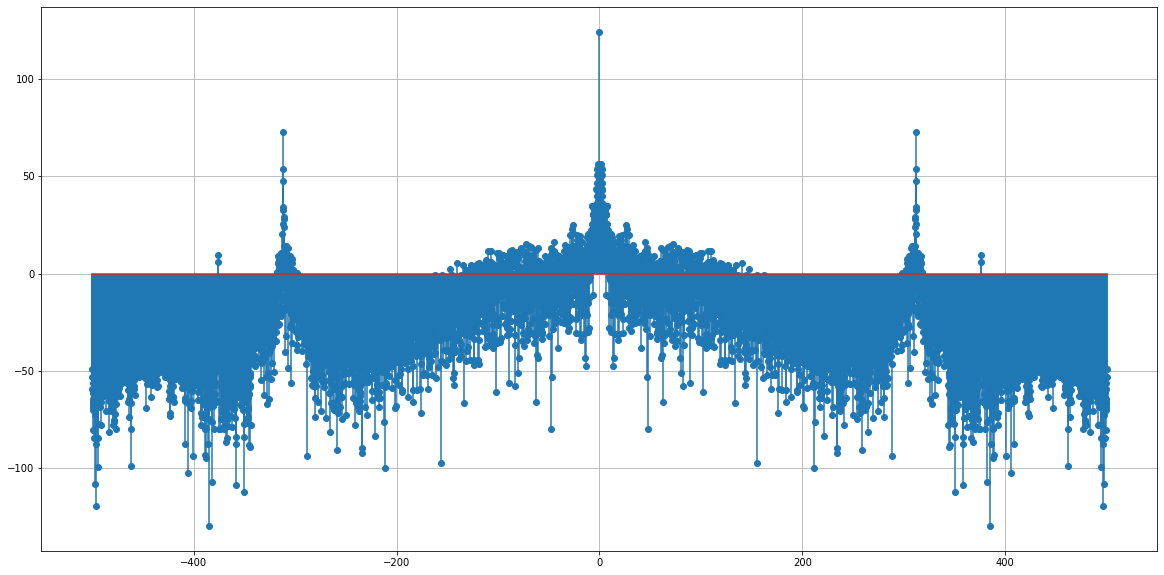

In [4]:
from matplotlib import pyplot as plt

len_of_ecg = len(ecg)

fft = np.fft.fft(ecg) / len(ecg)
freq = np.fft.fftfreq(ecg.shape[-1], 0.001)
#fft = np.fft.fftshift(fft)
fft_magnitude = 20*np.log(np.abs(fft))

plt.figure(figsize = (20,10))
plt.plot(freq,20*np.log(fft/fft.max()))
plt.grid()
plt.show()

plt.figure(figsize = (20,10))
plt.stem(freq, fft_magnitude)
plt.grid()
plt.show()


a


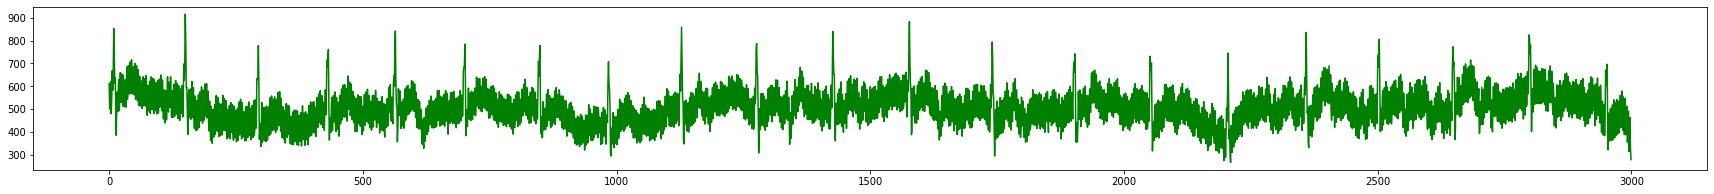

b


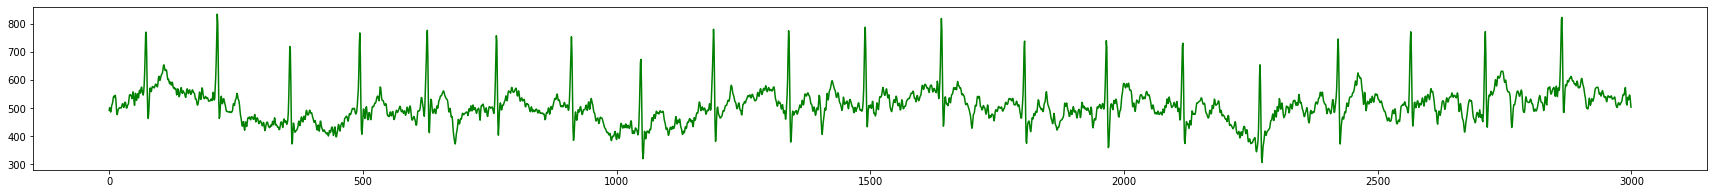

c


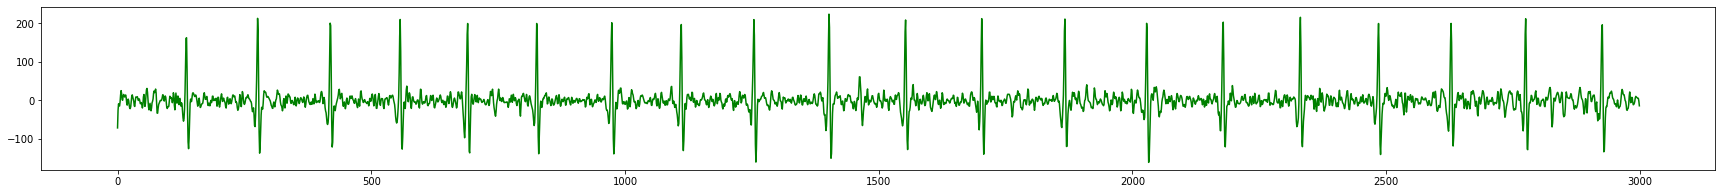

d


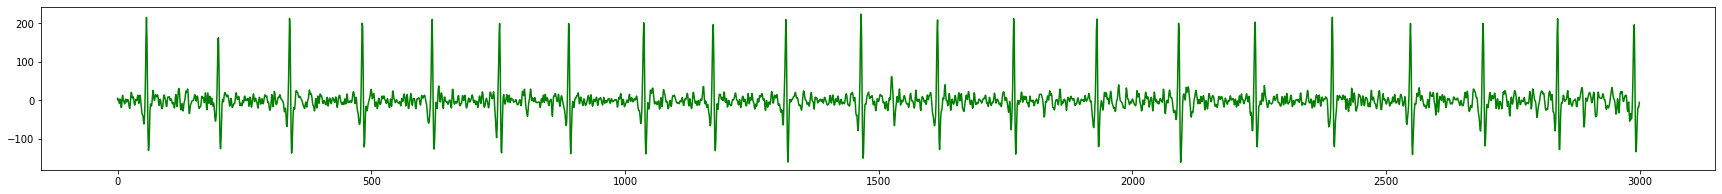

In [36]:
from scipy import signal

print("a")
  
plt.figure(figsize=(30,3))                    
plt.plot(ecg[2000:5000], 'g')
plt.show()                      
                      
# LPF 150
print("b")
lowpass = signal.firwin(127, cutoff = 150, fs = 500, pass_zero = 'lowpass')  
LPF_ecg = signal.lfilter(lowpass, [np.float16(1.)], ecg)

plt.figure(figsize=(30,3))                      
plt.plot(LPF_ecg[2000:5000], 'g')
plt.show()

# HPF 20
print("c")
plt.figure(figsize=(30,3))        
highpass = signal.firwin(127, cutoff = 20, fs = 500, pass_zero = 'highpass')  
HPF_ecg = signal.lfilter(highpass, [np.float16(1.)], LPF_ecg)
plt.plot(HPF_ecg[2000:5000], 'g')
plt.show()

# nortch
print("d")
highpass = signal.firwin(127, cutoff = (59.9, 60.1), fs = 500, pass_zero = 'bandstop')  
HPF_ecg = signal.lfilter(highpass, [np.float16(1.)], HPF_ecg)
plt.figure(figsize=(30,3))
plt.plot(HPF_ecg[2000:5000], 'g')
plt.show()

#HPF_ecg = (HPF_ecg - HPF_ecg.min()) /(HPF_ecg.max() - HPF_ecg.min())

#plt.figure(figsize = (30, 3))
#plt.plot(HPF_ecg[2000:5000], 'g')
#plt.show()



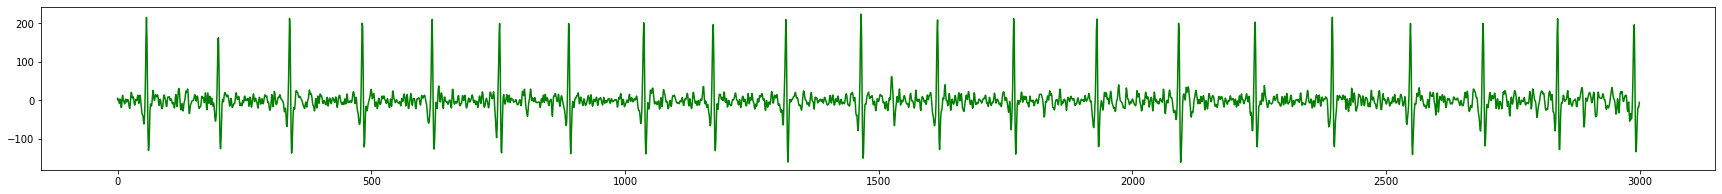

In [6]:
plt.figure(figsize=(30,3))  
plt.plot(HPF_ecg[2000:5000], 'g')
plt.show()

In [7]:
len(HPF_ecg)

7841

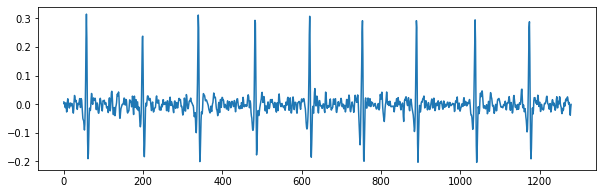

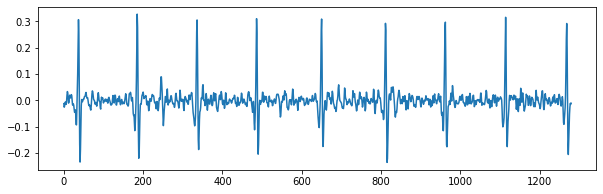

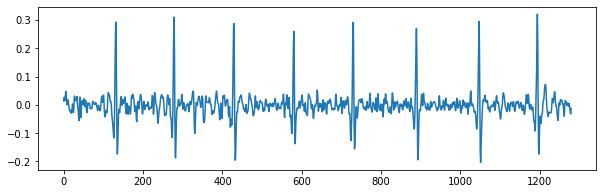

In [26]:
HPF_ecg = HPF_ecg[2000:7840]

HPF_ecg = (HPF_ecg / 1024) *1.5

ecg_sep = []

for j in range(3):
    ecg_sep.append(HPF_ecg[j * 1280 : 1280 * (j + 1)]) 
        
ecg_sep = np.array(ecg_sep)        

for i in range(3):
    plt.figure(figsize = (10, 3))
    plt.plot(ecg_sep[i,:])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

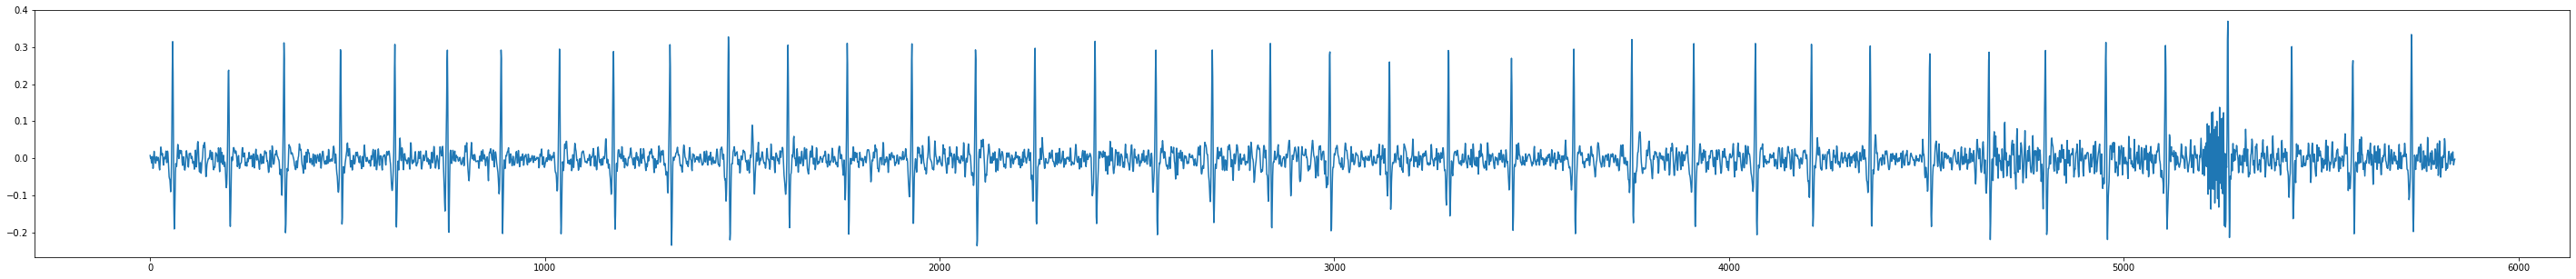

In [31]:
plt.figure(figsize = (50, 5))
plt.plot(HPF_ecg)
plt.show

In [9]:
ecg_sep = (ecg_sep - ecg_sep.min()) / (ecg_sep.max() - ecg_sep.min())



import tensorflow as tf

ecg_model = tf.keras.models.load_model('filter_size_10_BN')

prediction = ecg_model.predict(ecg_sep)

print(prediction)

1/1 [==============================] - 18s 18s/step
[[5.8058817e-05 9.9994195e-01]
 [7.0926387e-10 1.0000000e+00]
 [1.4969654e-03 9.9850309e-01]]


In [10]:
np.round(prediction)

array([[0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
np.savetxt('C:\\Users\\user\\Desktop\\ecg_test.txt', HPF_ecg, fmt='%f')

In [33]:
import numpy as np

sum = np.sum(ecg_sep[0, :])

print(sum)


-2.2246455694639033


In [34]:
np.savetxt('C:\\Users\\user\\Desktop\\heart_breaker.txt', ecg_sep[0], fmt='%f')

NameError: name '__sizeof__' is not defined